In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\user\Downloads\Google playstore4.csv")
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


In [7]:
df.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10940\1501272357.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)


In [65]:
df['Type'].dropna(inplace=True)

In [59]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
# Data visualization

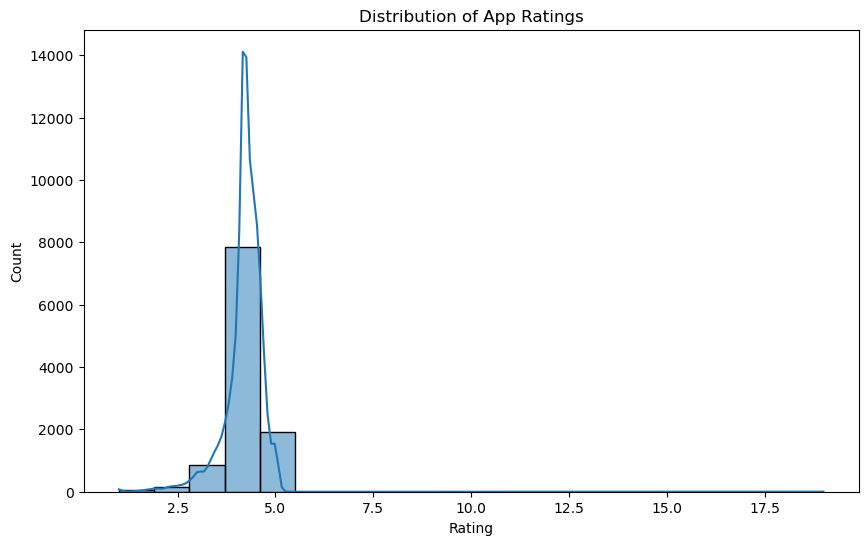

In [13]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.show()

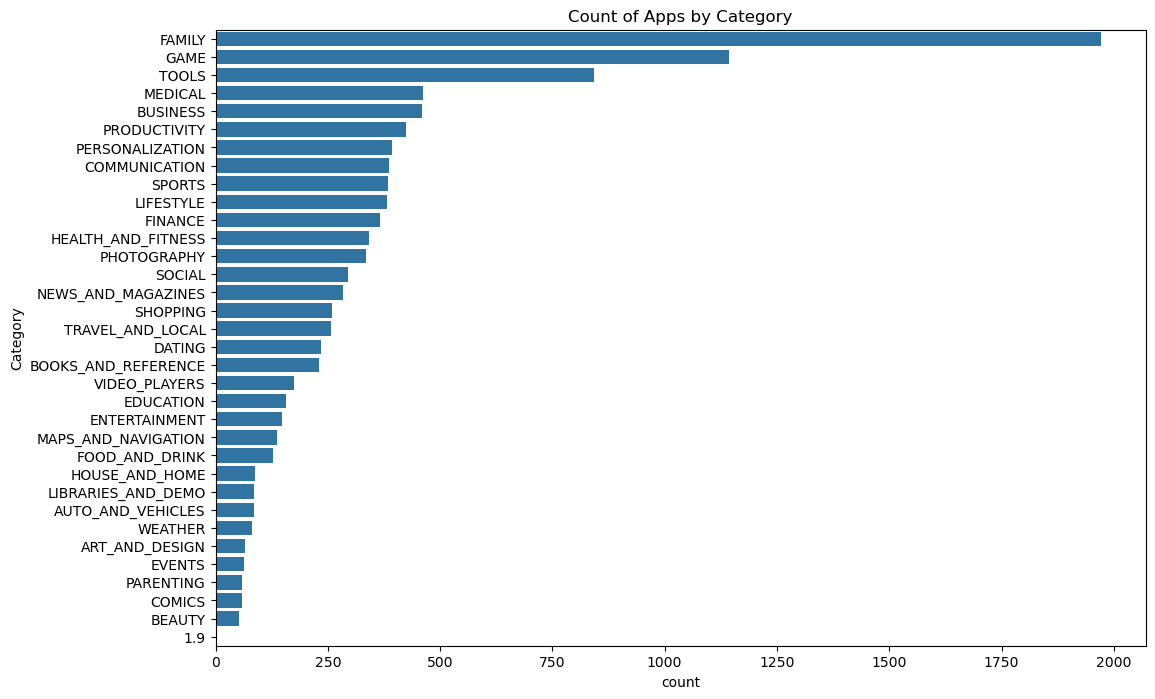

In [17]:
#Count of Apps by Category
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=df,
order=df['Category'].value_counts().index)
plt.title('Count of Apps by Category')
plt.show()

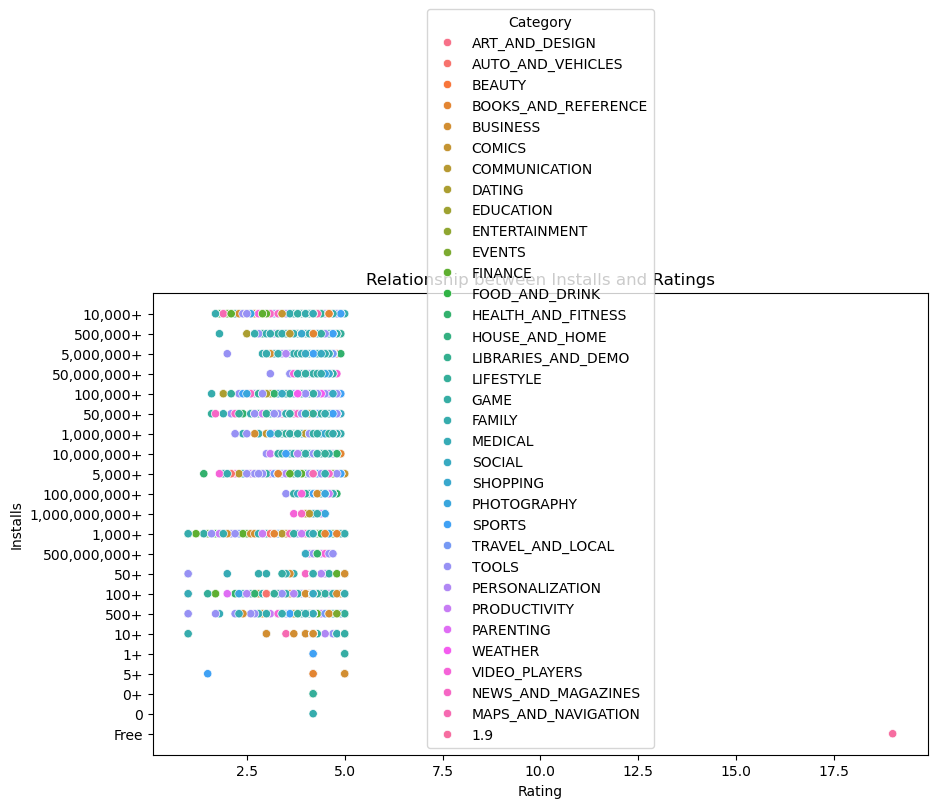

In [19]:
# Relationship between Installs and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Installs', hue='Category',
data=df)
plt.title('Relationship between Installs and Ratings')
plt.show()


In [23]:
# Average rating by category
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(avg_rating_by_category)

Category
1.9                    19.000000
EDUCATION               4.387778
EVENTS                  4.363647
ART_AND_DESIGN          4.350462
BOOKS_AND_REFERENCE     4.311026
PERSONALIZATION         4.307603
GAME                    4.282506
PARENTING               4.282223
HEALTH_AND_FITNESS      4.266296
BEAUTY                  4.260882
SHOPPING                4.254052
SOCIAL                  4.248001
WEATHER                 4.239675
SPORTS                  4.218404
PRODUCTIVITY            4.208287
HOUSE_AND_HOME          4.196819
FAMILY                  4.192394
PHOTOGRAPHY             4.192179
AUTO_AND_VEHICLES       4.190824
MEDICAL                 4.190167
LIBRARIES_AND_DEMO      4.181962
FOOD_AND_DRINK          4.170709
COMMUNICATION           4.163842
COMICS                  4.156445
BUSINESS                4.145987
NEWS_AND_MAGAZINES      4.142993
FINANCE                 4.139108
ENTERTAINMENT           4.126174
TRAVEL_AND_LOCAL        4.119716
LIFESTYLE               4.112427
V

In [29]:
# Most popular apps (by installs)
most_installed_apps = df[['App',
'Installs']].sort_values(by='Installs',
ascending=False).head(10)
print(most_installed_apps)

                                               App      Installs
10472      Life Made WI-Fi Touchscreen Photo Frame          Free
420    UC Browser - Fast Download Private & Secure  500,000,000+
474                    LINE: Free Calls & Messages  500,000,000+
3767                  Flipboard: News For Our Time  500,000,000+
3574                                   Cloud Print  500,000,000+
3326                  Gboard - the Google Keyboard  500,000,000+
431                                Viber Messenger  500,000,000+
4222                 imo free video calls and chat  500,000,000+
3235                              Google Translate  500,000,000+
1842                              Candy Crush Saga  500,000,000+


In [31]:
# Top 5 genres
top_genres = df['Genres'].value_counts().head(5)
print(top_genres)

Genres
Tools            842
Entertainment    623
Education        549
Medical          463
Business         460
Name: count, dtype: int64
